In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 파이토치(PyTorch)

* 페이스북이 초기 루아(Lua) 언어로 개발된 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개
* 초기에 토치(Torch)는 넘파이(NumPy) 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
* 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴
* 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공

## 파이토치의 구성요소

- `torch`: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- `torch.autograd`: 자동 미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리
- `torch.optim`: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.onnx`: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용

## 텐서(Tensors)

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
* 넘파이(NumPy)의 ndarray와 유사
* GPU를 사용한 연산 가속 가능
* 데이터를 담는 컨테이너 같은 것
* 5D는 영상 4D는 이미지

In [ ]:
import torch
torch.__version__

'1.13.0+cu116'

In [ ]:
x = torch.empty(4,2)
print(x)

tensor([[6.7705e-34, 0.0000e+00],
        [3.5032e-44, 0.0000e+00],
        [       nan, 0.0000e+00],
        [1.1578e+27, 7.1463e+22]])


In [ ]:
import numpy as np
x= np.empty([4,2])
print(x)

[[3.58513637e-316 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000]]


- 무작위로 초기화된 텐서

In [ ]:
x = torch.rand(4,2) # 0~1 사이의 숫자를 균등하게 생성
print(x)

tensor([[0.8736, 0.6420],
        [0.1921, 0.6131],
        [0.7945, 0.8292],
        [0.2422, 0.8253]])


# torch dtype

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |


In [ ]:
ft =torch.FloatTensor([1,2,3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [ ]:
print(ft.short())#16
print(ft.int())#32
print(ft.long()) #64

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [ ]:
it = torch.IntTensor([1,2,3])
print(it.double())
print(it.half())

tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


In [ ]:
# float 32 double 64 

- 데이터 타입(dtype)이 long이고, 0으로 채워진 텐서

In [ ]:
x = torch.zeros(4,2, dtype = torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


- 사용자가 입력한 값으로 텐서 초기화

In [ ]:
x = torch.tensor([3,2.3])
print(x)

tensor([3.0000, 2.3000])


- 2x4 크기, double 타입, 1로 채워진 텐서

In [ ]:
x = x.new_ones(2,4, dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


- x와 같은 크기 , float 타입, 무작위로 채워진 텐서

In [ ]:
x = torch.randn_like(x, dtype=torch.float) # randn 정규분포이다. 사이즈를 튜플로 입력하지 않고 기존의 텐서 정의 
print(x)

tensor([[-0.0108, -0.4071, -0.7878, -0.2614],
        [-2.1900, -1.3397,  2.1123, -1.4909]])


In [ ]:
x =torch.randn(5) # 평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용해 생성
print(x)

tensor([-0.2948,  0.5732, -0.0141,  0.4629,  1.1328])


- 텐서 크기 계산

In [ ]:
print(x.size())

torch.Size([2, 4])


# CUDA Tensors
- .to 메소드를 사용하여 텐서를 어떠한 장치(cpu, gpu)로도 옮길 수 있음

NVIDIA가 만든 병렬 컴퓨팅 플랫폼 및 API 모델로, 보통 '쿠다'라고 발음한다. CUDA 플랫폼은 GPU 의 가상 명령어셋을 사용할 수 있도록 만들어주는 소프트웨어 레이어이며, NVIDIA가 만든 CUDA 코어가 장착된 GPU에서 작동


In [ ]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.4007])
0.4007435441017151
torch.float32


In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # 쿠다 이용할수 있다면 쿠다 아니면 cpu
print(device)           # 만약 None로한다면 cpu라고 뜰것이다.

cuda


In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # 쿠다 이용할수 있다면 쿠다 아니면 cpu
print(device)           # 만약 None로한다면 cpu라고 뜰것이다.

cpu


# 다차원 텐서 표현

0D Tensor(Scalar)
- 하나의 숫자를 담고 있는 텐서(Tensor)
- 축과 현상이 없음

In [ ]:
t0 = torch.tensor(0) #t0 = torch.tensor(1)도 된다.

print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


1D Tensor(Vector)
- 값들을 저장한 리스트와 유산한 텐서
- 하나의 축이 존재

In [ ]:
t1 = torch.tensor([1,2,3]) #t0 = torch.tensor([1])도 된다.
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


2D Tensor(Matrix)
- 행렬과 같은 모양으로 두개의 축이 존재
- 일반적인 수치, 통계 데이터셋이 해당
- 주로 샘플(Sample)과 특성(Features)을 가진 구조로 사용

In [ ]:
t2 = torch.tensor([[1,2,3],
                    [4,5,6]]) #t0 = torch.tensor([1])도 된다.
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])


In [ ]:
3D Tensor

In [ ]:
t3 = torch.tensor([[[1,2],
                   [4,5],
                   [7,8]]]) #t0 = torch.tensor([1])도 된다.
print(t3.ndim)
print(t3.shape)
print(t3)

3
torch.Size([1, 3, 2])
tensor([[[1, 2],
         [4, 5],
         [7, 8]]])


In [ ]:
t4 = torch.tensor([[[[1,2],
                   [4,5],
                    [6,7],
                   [7,8]]]]) #t0 = torch.tensor([1])도 된다.
print(t4.ndim)
print(t4.shape)
print(t4)

4
torch.Size([1, 1, 4, 2])
tensor([[[[1, 2],
          [4, 5],
          [6, 7],
          [7, 8]]]])


# 텐서의 연산 
- 텐서에 대한 수학 연산, 삼각함수, 비트 연산, 비교 연산, 집계 등 제공

In [ ]:
# http://aigong.tistory.com/178
import math

a = torch.randn(1,2)
print(a)
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5, 0.5))

# 즉, 입력값이 min < x(input)< max이면 x 가 그대로 나오지만
# min 보다 작으면 min 값이, max 보다 크면 max 값이 나오는 구조입니다!

tensor([[ 0.9031, -0.4794]])
tensor([[0.9031, 0.4794]])
tensor([[1., -0.]])
tensor([[ 0., -1.]])
tensor([[ 0.5000, -0.4794]])


In [ ]:
print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a))
print(torch.unique(torch.tensor([1,2,3,1,2,1])))

tensor([[ 0.9031, -0.4794]])
tensor(-0.4794)
tensor(0.9031)
tensor(0.2118)
tensor(0.9776)
tensor(-0.4329)
tensor([1, 2, 3])


max 와 min은 dim인자를 줄 경우 argmax와 argmin도 합께 리턴
- argmax: 최대값을 가진 인덱스
- argmin: 최소값을 가진 인덱스

In [ ]:
x = torch.rand(2,2)
print(x,'\n')
print(x.max(dim=0),'\n') # 열쪽으로 봄 ㅣ
print(x.max(dim=1)) # 행쪽으로 봄 --

tensor([[0.0728, 0.4005],
        [0.8616, 0.5244]]) 

torch.return_types.max(
values=tensor([0.8616, 0.5244]),
indices=tensor([1, 1])) 

torch.return_types.max(
values=tensor([0.4005, 0.8616]),
indices=tensor([1, 0]))


In [ ]:
x = torch.rand(2,2)
print(x,'\n')
print(x.min(dim=0),'\n')
print(x.min(dim=1))

tensor([[0.0780, 0.2704],
        [0.1743, 0.3936]]) 

torch.return_types.min(
values=tensor([0.0780, 0.2704]),
indices=tensor([0, 0])) 

torch.return_types.min(
values=tensor([0.0780, 0.1743]),
indices=tensor([0, 0]))


In [ ]:
x = torch.rand(2,2)
print(x)
y= torch.rand(2,2)
print(y)

tensor([[0.6044, 0.0545],
        [0.0156, 0.1185]])
tensor([[0.0825, 0.7206],
        [0.9808, 0.2290]])


torch.add : 덧셈

In [ ]:
print(x+y)
print(torch.add(x,y))

tensor([[0.6868, 0.7751],
        [0.9964, 0.3475]])
tensor([[0.6868, 0.7751],
        [0.9964, 0.3475]])


결과 텐서를 인자로 제공

In [ ]:
result = torch.empty(2,4)
torch.add(x,y, out= result)
print(result)

tensor([[0.6868, 0.7751],
        [0.9964, 0.3475]])


<ipython-input-29-48911a921e87>:2: UserWarning: An output with one or more elements was resized since it had shape [2, 4], which does not match the required output shape [2, 2]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at ../aten/src/ATen/native/Resize.cpp:17.)
  torch.add(x,y, out= result)


in-place 방식
- in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _'가 붙음
- x.copy_(y), x.t_()

In [ ]:
print(x)
print(y)
y.add(x)
print(y)

tensor([[0.6044, 0.0545],
        [0.0156, 0.1185]])
tensor([[0.0825, 0.7206],
        [0.9808, 0.2290]])
tensor([[0.0825, 0.7206],
        [0.9808, 0.2290]])


torch.sub : 뺄셈

In [ ]:
print(x)
print(y)
print(x-y,'\n')
x.sub_(y) # x값에 y 뺀거 inplace 방식이다.
print(x)
print(torch.sub(x,y))
print(x.sub(y))

tensor([[ 0.5219, -0.6661],
        [-0.9652, -0.1105]])
tensor([[0.0825, 0.7206],
        [0.9808, 0.2290]])
tensor([[ 0.4395, -1.3867],
        [-1.9460, -0.3395]]) 

tensor([[ 0.4395, -1.3867],
        [-1.9460, -0.3395]])
tensor([[ 0.3570, -2.1073],
        [-2.9269, -0.5685]])
tensor([[ 0.3570, -2.1073],
        [-2.9269, -0.5685]])


torch.mul: 곱셈

In [ ]:
print(x)
print(y)
print(x*y)
x.mul_(y)
print(x)
print()
print(torch.mul(x,y))
print(x.mul(y))

tensor([[ 0.4395, -1.3867],
        [-1.9460, -0.3395]])
tensor([[0.0825, 0.7206],
        [0.9808, 0.2290]])
tensor([[ 0.0362, -0.9993],
        [-1.9087, -0.0777]])
tensor([[ 0.0362, -0.9993],
        [-1.9087, -0.0777]])

tensor([[ 0.0030, -0.7201],
        [-1.8721, -0.0178]])
tensor([[ 0.0030, -0.7201],
        [-1.8721, -0.0178]])


torch.div : 나눗셈

In [ ]:
print(x)
print(y)
print(x/y)
x.div_(y)
print(x)
print(torch.div(x,y))
print(x.div(y))

tensor([[ 0.0362, -0.9993],
        [-1.9087, -0.0777]])
tensor([[0.0825, 0.7206],
        [0.9808, 0.2290]])
tensor([[ 0.4395, -1.3867],
        [-1.9460, -0.3395]])
tensor([[ 0.4395, -1.3867],
        [-1.9460, -0.3395]])
tensor([[ 5.3300, -1.9244],
        [-1.9841, -1.4824]])
tensor([[ 5.3300, -1.9244],
        [-1.9841, -1.4824]])


torch.mm : 내적

In [ ]:
print(x)
print(y)
print(torch.matmul(x,y))
z = torch.mm(x,y)
print(z)
print(torch.svd(z)) # singular value decomposition A= U 시그마 VT v의 전치 행렬/ 분리하는 것 
# s는 대각에만 값이 있음

# 내적은 입력 데이터에 가중치가 들어오면 계산하는 것이 내적이다. 
# 5,10 , (135) x값 5,10 가중치 5x1 + 10x2 = 25y1 결과가 나옴 
#        ( 246)

tensor([[ 0.4395, -1.3867],
        [-1.9460, -0.3395]])
tensor([[0.0825, 0.7206],
        [0.9808, 0.2290]])
tensor([[-1.3239e+00, -8.6580e-04],
        [-4.9341e-01, -1.4801e+00]])
tensor([[-1.3239e+00, -8.6580e-04],
        [-4.9341e-01, -1.4801e+00]])
torch.return_types.svd(
U=tensor([[-0.5188, -0.8549],
        [-0.8549,  0.5188]]),
S=tensor([1.6826, 1.1643]),
V=tensor([[ 0.6589,  0.7523],
        [ 0.7523, -0.6589]]))


# 텐서의 조작(Manipulations)
- 인덱싱(indexing): Numpy처럼 인덱싱 형태로 사용가능

In [ ]:
import torch
x= torch.Tensor([[1,2],[3,4]])
print(x)

print(x[1,0])
print(x[0,1])
print(x[1,0])
print(x[1,1])
print(x[:,0])
print(x[:,1])
print(x[0,:])
print(x[1,:])

tensor([[1., 2.],
        [3., 4.]])
tensor(3.)
tensor(2.)
tensor(3.)
tensor(4.)
tensor([1., 3.])
tensor([2., 4.])
tensor([1., 2.])
tensor([3., 4.])


https://bigdatadiary0819.tistory.com/60

º 랜덤한 값을 가지는 텐서 생성

1. torch.rand() : 0과 1 사이의 숫자를 균등하게 생성

2. torch.rand_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

3. torch.randn() : 평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용해 생성

4. torch.randn_like() :  사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

5. torch.randint() : 주어진 범위 내의 정수를 균등하게 생성

6. torch.randint_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

7. torch.randperm() : 주어진 범위 내의 정수를 랜덤하게 생성

º 특정한 값을 가지는 텐서 생성

1. torch.arange() : 주어진 범위 내의 정수를 순서대로 생성

2. torch.ones() : 주어진 사이즈의 1로 이루어진 텐서 생성

3. torch.zeros() : 주어진 사이즈의 0으로 이루어진 텐서 생성

4. torch.ones_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

5. torch.zeros_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

6. torch.linspace() : 시작점과 끝점을 주어진 갯수만큼 균등하게 나눈 간격점을 행벡터로 출력
7. torch.logspace() : 시작점과 끝점을 주어진 갯수만큼 로그간격으로 나눈 간격점을 행벡터로 출력

지수함수와 로그함수는 어떤 관계?
지수함수는 갈수록 급격하게 증가 , 로그함수는 갈수록 완만 , 서로 역의 관계 
데이터가 급격하게 차이나는 것은 좀 완만하게 만들어서 펼쳐보는 것 그치만 상대적인 포지션은 그대로이다. 



view: 텐서의 크기(size)나 모양(shape)을 변경
- 기본적으로 변경 전과 후에 텐서 안의 원소 개수가 유지되어야함 
- -1로 설정되면 계산을 통해 해당 크기값을 유추

In [ ]:
x = torch.randn(4,5)
print(x)
print(x.shape)
print(x.size())

tensor([[ 0.7496, -0.1387,  0.1666,  1.3552, -0.0973],
        [-0.7027, -0.4761, -1.4615, -1.0517, -0.2220],
        [-0.9049,  0.4262,  0.7736,  0.8185, -0.7613],
        [-0.5059,  0.0399,  0.1557,  0.3412,  0.6211]])
torch.Size([4, 5])
torch.Size([4, 5])


In [ ]:
x = torch.FloatTensor([
    [1,2],
    [3,4],
    [5,6],
    [7,8]
])

# size를 활용한 텐서 사이즈 보기
print(x.size())
# shape 활용한 텐서 사이즈 보기
print(x.shape)
# dim을 활용한 텐서 차원 확인
print(x.dim())
# 1차원 사이즈 확인 
print(x.size(0))
# 1차원 사이즈 확인
print(x.shape[0])# 4행꺼 가지고 온다. 걍 리스트로 묶여있음


torch.Size([4, 2])
torch.Size([4, 2])
2
4
4


In [ ]:
x =torch.randn(4,5)
print(x)
print()
y=x.view(20) # 1차원으로 바뀐다.
print(y)
z= x.view(5,-1) # 5행 4열짜리로 만든다. 
print(z)

tensor([[ 0.9644, -0.2191,  0.6467,  0.1098,  1.5238],
        [ 0.6451,  0.3305, -1.3040,  1.2694, -0.3974],
        [-0.9387,  1.1219, -2.2525,  0.4325, -1.4638],
        [-0.7759, -0.2133,  0.5275,  2.9315,  0.7155]])

tensor([ 0.9644, -0.2191,  0.6467,  0.1098,  1.5238,  0.6451,  0.3305, -1.3040,
         1.2694, -0.3974, -0.9387,  1.1219, -2.2525,  0.4325, -1.4638, -0.7759,
        -0.2133,  0.5275,  2.9315,  0.7155])
tensor([[ 0.9644, -0.2191,  0.6467,  0.1098],
        [ 1.5238,  0.6451,  0.3305, -1.3040],
        [ 1.2694, -0.3974, -0.9387,  1.1219],
        [-2.2525,  0.4325, -1.4638, -0.7759],
        [-0.2133,  0.5275,  2.9315,  0.7155]])


item : 텐서에 값이 하나라도 존재하면 숫자값을 얻을 수 있음

In [ ]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.8570])
0.8569909334182739
torch.float32


sqeeze : 차원을 축소(제거)

In [ ]:
tensor =torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.2433, 0.8037, 0.1119],
         [0.1858, 0.3847, 0.7959],
         [0.4511, 0.4619, 0.0179]]])
torch.Size([1, 3, 3])


In [ ]:
t= tensor.squeeze()
print(t) # 차원을 줄임
print(t.shape)

tensor([[0.2433, 0.8037, 0.1119],
        [0.1858, 0.3847, 0.7959],
        [0.4511, 0.4619, 0.0179]])
torch.Size([3, 3])


In [ ]:
t = torch.rand(3,3)
print(t)
print(t.shape)

tensor([[0.8629, 0.9985, 0.1802],
        [0.6077, 0.7268, 0.4178],
        [0.6649, 0.8298, 0.1809]])
torch.Size([3, 3])


In [ ]:
tensor =t.unsqueeze(dim=0)
print(tensor)
print(tensor.shape)

tensor([[[0.8629, 0.9985, 0.1802],
         [0.6077, 0.7268, 0.4178],
         [0.6649, 0.8298, 0.1809]]])
torch.Size([1, 3, 3])


In [ ]:
tensor =tensor.unsqueeze(dim=2)
print(tensor)
print(tensor.shape)

tensor([[[[0.8629, 0.9985, 0.1802]],

         [[0.6077, 0.7268, 0.4178]],

         [[0.6649, 0.8298, 0.1809]]]])
torch.Size([1, 3, 1, 3])


stack : 텐서간 결합

In [ ]:
x = torch.FloatTensor([1,4])
print(x)
y = torch.FloatTensor([2,5])
print(y)
z= torch.FloatTensor([3,6])
print(z)
print(torch.stack([x,y,z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


cat : 텐서를 결합하는 메소드(concatenate)
- 넘파이의 stack과 유사하지만, 쌓을 Dim이 존재해야함
- 해당 차원을 늘려준 후 결합

In [ ]:
a =torch.randn(1,3,3)
print(a)
b =torch.randn(1,3,3)
print(b)
c= torch.cat((a,b), dim=0) # l 방향으로 결합
print(c)
print(c.size())

tensor([[[-0.2310, -0.5715,  1.0801],
         [ 0.6295,  0.9012,  0.9254],
         [-1.3447, -0.9238, -0.6820]]])
tensor([[[-0.4211,  0.6348, -0.0613],
         [ 1.0062, -0.3304,  0.0292],
         [ 0.0223,  0.5495, -0.6421]]])
tensor([[[-0.2310, -0.5715,  1.0801],
         [ 0.6295,  0.9012,  0.9254],
         [-1.3447, -0.9238, -0.6820]],

        [[-0.4211,  0.6348, -0.0613],
         [ 1.0062, -0.3304,  0.0292],
         [ 0.0223,  0.5495, -0.6421]]])
torch.Size([2, 3, 3])


In [ ]:
c= torch.concat((a,b), dim=1) # -- 방향으로 결합
print(c)
print(c.size())

tensor([[[-0.2310, -0.5715,  1.0801],
         [ 0.6295,  0.9012,  0.9254],
         [-1.3447, -0.9238, -0.6820],
         [-0.4211,  0.6348, -0.0613],
         [ 1.0062, -0.3304,  0.0292],
         [ 0.0223,  0.5495, -0.6421]]])
torch.Size([1, 6, 3])


In [ ]:
# 디시젼 트리는 분기점 같은게 그래프로 다 볼 수 있음 정확도 잘 안나와도 구조를 한눈에 볼 수 있음
# 제조업에서는 주로 쓰임 WHITE BOX이니까.
# 각사별 별도 운영되고 있는 상품 카테고리 등 통합 기준값 정비 
# 구매이력 데이터로부터 예측 모형에 적용할 반응변수 및 설명변수 탐색
# 독립변수와 종속변수의 상관관계가 높은 게 좋다. 영향력이 높다. 
# 종속변수가 독립변수에 영향미쳐도 좋다.
# 상관관계가 0이면 가장 안좋음 상관성 낮은 것은 뺀다.
# 독립변수간의 상관관계가 높으면 안좋다. 


chuck: 텐서를 여러 개로 나눌 때 사용(몇개로 나눌 것인가?)

In [ ]:
tensor = torch.rand(3,6)

t1, t2,t3 = torch.chunk(tensor, 3 , dim=1)
print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.3586, 0.5921, 0.2093, 0.5286, 0.9362, 0.4147],
        [0.2936, 0.3688, 0.9998, 0.0064, 0.9970, 0.2589],
        [0.8465, 0.7269, 0.1719, 0.3190, 0.1255, 0.9571]])
tensor([[0.3586, 0.5921],
        [0.2936, 0.3688],
        [0.8465, 0.7269]])
tensor([[0.2093, 0.5286],
        [0.9998, 0.0064],
        [0.1719, 0.3190]])
tensor([[0.9362, 0.4147],
        [0.9970, 0.2589],
        [0.1255, 0.9571]])


split : 'chunk'와 동일한 기능이지만 조금 다름(텐서의 크기는 몇인가?)

In [ ]:
tesor = torch.rand(3,6)
t1,t2,t3 =torch.split(tensor,2, dim=1) # 열방향? 2는 텐서의 크기 열방향으로 2개 갖는다.

print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.6836, 0.4026, 0.4666, 0.8456, 0.2008, 0.6560],
        [0.0720, 0.1714, 0.4392, 0.6008, 0.3241, 0.5997],
        [0.1540, 0.4977, 0.2116, 0.2417, 0.6670, 0.3027]])
tensor([[0.6836, 0.4026],
        [0.0720, 0.1714],
        [0.1540, 0.4977]])
tensor([[0.4666, 0.8456],
        [0.4392, 0.6008],
        [0.2116, 0.2417]])
tensor([[0.2008, 0.6560],
        [0.3241, 0.5997],
        [0.6670, 0.3027]])


torch <->numpy
- Torch Tensor(텐서)를 NumPy rray(배열)로 변환 가능

       - numpy()
       - from_numpy()

- Tensor가 CPU상에 있다면 numpy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변환

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available()else 'cpu')
print(device)

cuda


In [ ]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [ ]:
print(a.to('cpu', torch.double))# cpu는 복잡한거 처리유리 gpu는 단순하고 양이 많은거 유리
print(type(a)) # cpu에서도 torch사용 가능하다.

tensor([1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)
<class 'torch.Tensor'>


In [ ]:
b= a.numpy()
print(b)
print(type(b))

[1. 1. 1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [ ]:
a.add(1) # a는 텐서 b는 numpy이다. 
print(a)
print(type(a))
print(b)
print(type(b))

tensor([1., 1., 1., 1., 1., 1., 1.])
<class 'torch.Tensor'>
[1. 1. 1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [ ]:
import numpy as np

a = np.ones(7)
b= torch.from_numpy(a)
np.add(a,1,out=a)# a에 1을더해서 a를 출력
print(a)
print(b)#cpu에서 메모리 공유

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


In [ ]:
b = b.numpy()
np.add(b,2,out=b)

array([4., 4., 4., 4., 4., 4., 4.])

In [ ]:
# 역전파는 어떻게 할까? 합성함수 연쇄법칙.1
https://velog.io/@ssulee0206/%EC%97%AD%EC%A0%84%ED%8C%8C-%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95

# Autograd(자동미분)
- torch.autograd 패키지는 Tensor의 모든 연산에 대해 자동 미분 제공 
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻 
- backprop를 위해 미분값을 자동으로 계산

TORCH.AUTOGRAD를 사용한 자동 미분 

https://tutorials.pytorch.kr/beginner/basics/autogradqs_tutorial.html



requires_grad 속성을 True로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작 기록을
추적하는 것을 중단되게 하려면, .detach()를 호출하여 연산기록으로부터 분리

In [ ]:
a= torch.randn(3,3)
a= a*3 
print(a)
print(a.requires_grad)

tensor([[-3.2357,  0.6992,  1.9969],
        [ 2.5677, -2.6480,  1.3416],
        [ 3.0822,  3.3351,  1.7309]])
False


requires_grad_(...)는 기존 텐서의 requires_grad 값을 바꿔치기(in-place)하여 변경 


grad_fn: 미분값을 계산한 함수에 대한 정보 저장(어떤 함수에 대해서 backprop 했는지)

In [ ]:
a.requires_grad_(True)
print(a.requires_grad)
b=(a*a).sum()
print(b)
print(b.grad_fn) # 역전파 했을 때 sum이 했다. 

True
tensor(53.9692, grad_fn=<SumBackward0>)


# 기울기(Gradint)

In [ ]:
x = torch.ones(3,3, requires_grad= True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [ ]:
y= x+5
print(y) # 추적

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [ ]:
z = y+y 
out = z.mean() # out은 mean 한것임 
print(z, out) # 연산을 다 기억한다. mean / x에 한번 줬는 데 다 기억한다. 

tensor([[12., 12., 12.],
        [12., 12., 12.],
        [12., 12., 12.]], grad_fn=<AddBackward0>) tensor(12., grad_fn=<MeanBackward0>)


계산이 완료된 후 , backward()를 호출하면 자동으로 역전파 계산이 가능하고, .grad 속성에 누적됨

In [ ]:
print(out)
out.backward() # 가중치를 계산하는 것이다. 역전파로 가중치계산해서 적용시킨다. 손실이 최소가 되게

tensor(12., grad_fn=<MeanBackward0>)


In [ ]:
out.backward() # 쭉한번 뒤로 한번에 쭉 보냄 맨 앞으로 가서 

grad : data가 가져온 layer에 대한 미분값 지정

In [ ]:
print(x)
print(x.grad)# 미분값

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[0.2222, 0.2222, 0.2222],
        [0.2222, 0.2222, 0.2222],
        [0.2222, 0.2222, 0.2222]])


In [ ]:
x = torch.randn(3, requires_grad=True)
y=x*2

while y.data.norm()<1000:
  y=y*2
print(y)

tensor([ -849.4520, -1009.9009,  -119.2757], grad_fn=<MulBackward0>)


In [ ]:
y.data.norm()# norm 벡터 거리 구함 

tensor(1325.0266)

In [ ]:
# v 기준으로 backward 계산 v기준역전파 계산 

v= torch.tensor([0.1, 1.0, 0.0001],dtype=torch.float)
y.backward(v) 
print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


In [ ]:
y.backward(v) 

with torch.no_grad()를 사용하어 기울기의 업데이트를 하지 않음


기록을 추적하는 것을 방지하기 위해 코드 블럭을 with torch.no_grad()로 감싸면 기울기 계산을 필요없지만 , requires_grad = True로 설정 되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

In [ ]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
  print((x**2).requires_grad)# 기울기 계산 x

True
True
False


detach(): 내용물(content)은 같지만 require_grad가 다른 새로운 Tensor를 가져올 때

In [ ]:
print(x.requires_grad)
y=x.detach() # 분리 y는 false가됨 
print(y.requires_grad)
print(x)
print(y)
# print(x.eq(y).all())

True
False
tensor([-1.6591, -1.9725, -0.2330], requires_grad=True)
tensor([-1.6591, -1.9725, -0.2330])
tensor(True)


### 자동 미분 흐름 예제

- 계산 흐름 $a \rightarrow b  \rightarrow c  \rightarrow out $

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해 $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면 $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [ ]:
a= torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [ ]:
a= torch.ones(2,2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [ ]:
print(a.data)
print(a.grad)
print(a.grad_fn) # backward 안함

tensor([[1., 1.],
        [1., 1.]])
None
None


b = a+2

In [ ]:
b =a+2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


c =b**2

In [ ]:
c = b**2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [ ]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [ ]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


a의 grad_fn이 None인 이유는 직접적으로 계산한 부분이 없었기 때문

In [ ]:
print(a.data)
print(a.grad) # a_grad는 있다. 
print(a.grad_fn) 

tensor([[1., 1.],
        [1., 1.]])
tensor([[6., 6.],
        [6., 6.]])
None


In [ ]:
print(b.data)
print(b.grad)
print(b.grad_fn)

tensor([[3., 3.],
        [3., 3.]])
None


<ipython-input-50-7222c1aec66c>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  print(b.grad)


In [ ]:
print(c.data)
print(c.grad)
print(c.grad_fn)

tensor([[9., 9.],
        [9., 9.]])
None


<ipython-input-51-f6ca42a4f63f>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  print(c.grad)


In [ ]:
print(out.data)
print(out.grad)
print(out.grad_fn)

tensor(12.)
None


<ipython-input-58-85e75c577388>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  print(out.grad)


FashionMNIST 분류 모델

데이터 로드

In [ ]:
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
import torchvision.transforms as transforms
transform= transforms.Compose([transforms.ToTensor(), 
                             transforms.Normalize((0.5,),(0.5,))]) # 이게 뭔지?0과 1사이? 평균과 
                             # 표준편차 0.5 0.5 

In [ ]:
print(a.to('cpu', torch.double))# cpu는 복잡한거 처리유리 gpu는 단순하고 양이 많은거 유리
print(type(a)) # cpu에서도 torch사용 가능하다.

NameError: ignored

In [ ]:
trainset = datasets.FashionMNIST(root='/content/',
                                 train=True, download=True,
                                 transform=transform)
testset = datasets.FashionMNIST(root='/content/',
                                 train=False, download=True,
                                 transform=transform)


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



In [ ]:
!ls

drive  FashionMNIST  sample_data


In [ ]:
train_loader = DataLoader(trainset, batch_size=128, shuffle= True, num_workers=2) # 몇개의 cpu 코어를 사용할지
test_loader = DataLoader(testset, batch_size=128, shuffle= True, num_workers=2)

In [ ]:
for i in train_loader:
  print(i)
  break

In [ ]:
# iter은 반복가능한 객체에서 이터레이터를 반환하고 next는 이터레이터에서 값을 차례대로 꺼냄
# 데이터에 접근하려면 파이썬의 내장함수 이터와 next를 사용해 접근
images, labels =next(iter(train_loader)) # iter은 이터레이터 반복 가능한 객체로 받아온다. 
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

In [ ]:
labels

tensor([1, 8, 9, 5, 3, 3, 7, 8, 2, 6, 0, 6, 1, 5, 0, 1, 6, 3, 0, 9, 2, 8, 6, 2,
        7, 7, 9, 4, 6, 5, 0, 8, 3, 6, 4, 1, 3, 3, 0, 4, 8, 2, 1, 7, 5, 6, 0, 7,
        4, 2, 4, 8, 8, 7, 8, 1, 2, 7, 1, 9, 0, 6, 8, 6, 8, 6, 0, 1, 5, 5, 2, 1,
        1, 6, 6, 5, 9, 0, 9, 9, 6, 9, 8, 3, 4, 5, 1, 2, 5, 9, 2, 7, 5, 3, 0, 2,
        8, 1, 3, 7, 4, 6, 7, 4, 8, 3, 5, 6, 0, 9, 3, 5, 0, 5, 0, 6, 0, 6, 5, 2,
        0, 5, 9, 0, 8, 8, 5, 6])

In [ ]:
(images.squeeze()).shape

torch.Size([128, 28, 28])

In [ ]:
images.squeeze()

tensor([[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         ...,
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

        [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         ...,
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

        [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1

In [ ]:
labels[0].item()

1

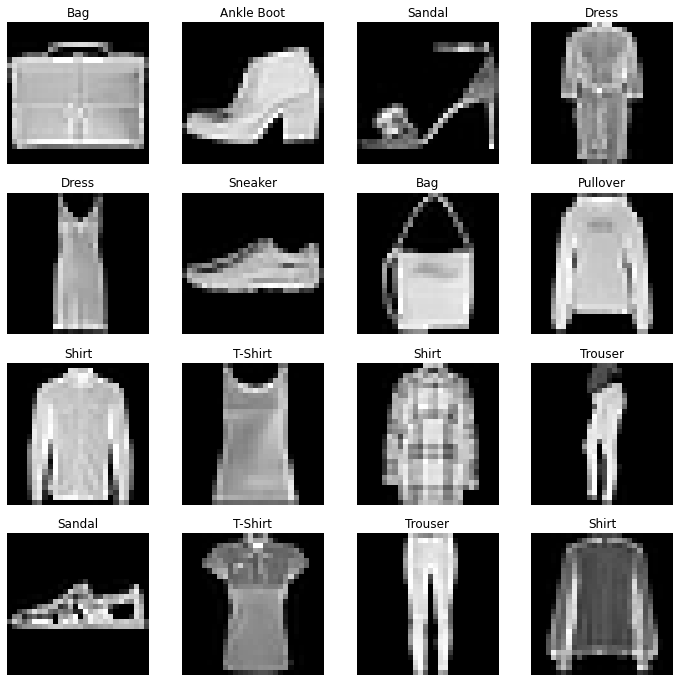

In [ ]:
import matplotlib.pyplot as plt
labels_map = {
    0:'T-Shirt',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle Boot',

}
figure =plt.figure(figsize=(12,12))
cols, rows =4,4
for i in range(1, cols*rows+1):
  image = images[i].squeeze() #  차원 축소 squeeze함수는 차원이 1인 차원을 제거해준다. 따로 차원을 설정하지 않으면 1인 차원을 모두 제거한다. 그리고 차원을 설정해주면 그 차원만 제거한다.
                              # 흑백 1을 줄여준다. 
  label_idx = labels[i].item() #? 키와 값을 가짐 
  label =labels_map[label_idx] # 숫자들이 값에 들어감

  figure.add_subplot(rows,cols,i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(image, cmap='gray')
plt.show()

# 모델 정의 및 파라미터

https://gaussian37.github.io/dl-concept-covolution_operation/#dilation-%EC%9D%B4%EB%9E%80-1

da

nn.Linear
- 선형계층은 저장된 가중치와 편향을 사용하여 입력에 선형변환을 적용하는 모듈



nn.ReLU
- 비선형 활성화는 모델의 입력과 출력 사이에 복잡한 관계를 만든다. 비선형 활성화는 선형변환 후에 적용되어 비선형성을 도입하고신경망이 다양한 현상을 학습할 수 있다.

In [ ]:
from torch import nn
from torch.nn import functional as f
class net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv2d_32 = nn.Conv2d(1,32,3 ,padding=1)
    self.conv2d_64 = nn.Conv2d(32,64,3 ,padding=1)
    self.max2d =nn.MaxPool2d(2,2)
    self.conv2d_128 = nn.Conv2d(64,128,3, padding=1)
    self.conv2d_64 = nn.Conv2d(128,256,3 , stride=2,padding=1)
    self.linear1 =nn.Linear(3*3*256,256)
    self.linear2 =nn.Linear(256,64) # Dense 선형으로 펴주는? 선형변환 Dense
    self.linear3 =nn.Linear(64,10)
    self.batch2d1 = nn.BatchNorm2d(64) # 정규화 해준거 거치면서 스케일 달라짐 그래서 배치단위로 정규화 스케일이 달라질수 있으니까?
    self.batch2d2 = nn.BatchNorm2d(128)
    self.batch1d = nn.BatchNorm1d(64)
    self.drop =nn.Dropout(p=0.3)
    self.flat =nn.Flatten()

    def forward(self,x):
      x= x.view(-1,1,28,28) # -1이 batch_size 128을 받아옴 ...conv층 activation relu 씀 지정안하면 자동으로 씀  reshape와 같다.
      x= f.relu(self.conv2d_32(x)) # 비선형
      x= f.relu(self.conv2d_64(x)) # 
      x = self.batch2d1(x) # 배치마다
      x= f.relu(self.max2d(x))# 맥스풀링도 relu
      x= self.drop(x)

      x= f.relu(self.conv2d_128(x)) 
      x= f.relu(self.conv2d_256(x))
      x = self.batch2d2(x) # 
      x= f.relu(self.mad2d(x))
      x= self.drop(x)

      x= self.flat(x)
      x = f.relu(self.linear1(x)) # Dense 층
      x= self.drop(x)
      x = f.relu(self.linear2(x))
      x= self.drop(x)
      x= self.batch1d(x)
      x= f.log_softmax(self.linear3(x), dim=1)
      return(x)

net =net()
print(net)

net(
  (conv2d_32): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d_64): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (max2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_128): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (linear1): Linear(in_features=2304, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
  (batch2d1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch2d2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch1d): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.3, inplace=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
)


In [ ]:
from torch import nn
from torch.nn import functional as f

## 초기 세팅
class net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv2d_32   = nn.Conv2d(1,32,3,padding=1)
    self.conv2d_64   = nn.Conv2d(32,64,3,padding=1)
    self.max2d       = nn.MaxPool2d(2,2)
    self.conv2d_128  = nn.Conv2d(64,128,3, padding=1)
    self.conv2d_256  = nn.Conv2d(128,256,3, stride=2, padding=1)
    self.linear1     = nn.Linear(3*3*256, 256)
    self.linear2     = nn.Linear(256, 64)
    self.linear3     = nn.Linear(64, 10)
    self.batch2d1    = nn.BatchNorm2d(64)
    self.batch2d2    = nn.BatchNorm2d(256)
    self.batch2d3    = nn.BatchNorm2d(64)
    self.batch1d = nn.BatchNorm1d(64)

    self.drop        = nn.Dropout(p=0.3)
    self.flat        = nn.Flatten()

  def forward(self,x):
    x = x.view(-1,1,28,28)            ## view는 선을 줄여준다. 1, 28,28은 지키고 -1은 알아서 한다.
    x = f.relu(self.conv2d_32(x))
    x = f.relu(self.conv2d_64(x))
    x = self.batch2d1(x)
    x = f.relu(self.max2d(x))
    x = self.drop(x)

    x = f.relu(self.conv2d_128(x))
    x = f.relu(self.conv2d_256(x))
    x = self.batch2d2(x)
    x = f.relu(self.max2d(x))
    x = self.drop(x)

    x = self.flat(x)
    x = f.relu(self.linear1(x))
    x = self.drop(x)
    x = f.relu(self.linear2(x))
    x = self.drop(x)
    x = self.batch1d(x)
    x = f.log_softmax(self.linear3(x), dim=1)
    return(x)  ## 출력값은 softmax이기 때문에 확률로 나온다.

net = net()
print(net)

net(
  (conv2d_32): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d_64): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_128): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d_256): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (linear1): Linear(in_features=2304, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
  (batch2d1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch2d2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch2d3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch1d): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop):



파이토치 공부


https://tutorials.pytorch.kr/beginner/basics/buildmodel_tutorial.html

In [ ]:
params =list(net.parameters())
print(len(params))
print(params[0].size())

22
torch.Size([32, 1, 3, 3])


# 손실함수와 옵티마이저

In [ ]:
import torch
criterion =nn.NLLLoss() # 손실함수,,,?
optimizer = torch.optim.Adam(net.parameters(), lr=0.008)

# 모델 학습

### 배치수 확인

In [ ]:
total_batch = len(train_loader)
print(total_batch)

469


zero_grad()


보통 딥러닝에서는 미니배치+루프 조합을 사용해서 parameter들을 업데이트하는데, 한 루프에서 업데이트를 위해 loss.backward()를 호출하면 각 파라미터들의 .grad 값에 변화도가 저장이 된다.

이후 다음 루프에서 zero_grad()를 하지않고 역전파를 시키면 이전 루프에서 .grad에 저장된 값이 다음 루프의 업데이트에도 간섭을 해서 원하는 방향으로 학습이 안된다고 한다.

따라서 루프가 한번 돌고나서 역전파를 하기전에 반드시 zero_grad()로 .grad 값들을 0으로 초기화시킨 후 학습을 진행해야 한다.


In [ ]:
for epoch in range(10):
  running_loss = 0.0    #초기화
  for i, data in enumerate(train_loader, 0): # 이게 뭔뜻? 
    inputs, labels = data
    optimizer.zero_grad() # 원래 가중치는 점점 더해지는 것이 아닌가?
    outputs = net(inputs) # network
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()  # weight를 업데이트하는 시점은 optimizer.step()이 실행되는 시점 

    running_loss += loss.item()
    if i% 100 == 99:
      print('Epoch:{}, iter:{}, Loss:{}'.format(epoch+1, i+1, running_loss/2000))
      running_loss = 0.0

Epoch:1, iter:100, Loss:0.015952462516725063
Epoch:1, iter:200, Loss:0.0153284163326025
Epoch:1, iter:300, Loss:0.014702941551804542
Epoch:1, iter:400, Loss:0.015393714591860772
Epoch:2, iter:100, Loss:0.014325979791581631
Epoch:2, iter:200, Loss:0.014261383421719074
Epoch:2, iter:300, Loss:0.014475009173154831
Epoch:2, iter:400, Loss:0.014203541174530983
Epoch:3, iter:100, Loss:0.013446955658495427
Epoch:3, iter:200, Loss:0.012965340431779623
Epoch:3, iter:300, Loss:0.01357345913350582
Epoch:3, iter:400, Loss:0.013761750347912311
Epoch:4, iter:100, Loss:0.012659864485263824
Epoch:4, iter:200, Loss:0.013376673474907876
Epoch:4, iter:300, Loss:0.01327611930668354
Epoch:4, iter:400, Loss:0.013208089552819728
Epoch:5, iter:100, Loss:0.012544189512729644
Epoch:5, iter:200, Loss:0.011885029200464487
Epoch:5, iter:300, Loss:0.012569826021790504
Epoch:5, iter:400, Loss:0.012146006226539613
Epoch:6, iter:100, Loss:0.011211757823824883
Epoch:6, iter:200, Loss:0.011916918754577637
Epoch:6, iter:

In [ ]:
PATH = './fashion_mnist.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
#모델 테스트
import numpy as np
def imshow(image):
  image = image / 2 + 0.5
  npimg = image.numpy()

  fig = plt.figure(figsize=(16,8))
  plt.imshow(np.traspose(npimg, (1,2,0)))   #rgb -> gbr
  plt.show()

In [ ]:
import torchvision

images, labels = next(iter(test_loader))

imshow(torchvision.utils.make_grid(images[:6]))

AttributeError: ignored

<Figure size 1152x576 with 0 Axes>

In [ ]:
#예시, 하나 뽑아본 것
import torch
import torch.nn as nn

data = torch.randn((5,5))
print(data)
print(torch.max(data, dim=1))

tensor([[-0.4001,  0.1213,  0.9578, -0.3525, -1.0966],
        [ 1.0254, -1.0386,  0.2100, -0.7311,  0.3577],
        [-2.2518, -1.1146,  0.0284, -0.9777, -0.5315],
        [ 0.5200, -0.8025, -0.7039, -0.5252,  0.8939],
        [ 0.2517,  0.3791,  0.0866, -0.7369,  1.1181]])
torch.return_types.max(
values=tensor([0.9578, 1.0254, 0.0284, 0.8939, 1.1181]),
indices=tensor([2, 0, 2, 4, 4]))


In [ ]:
outputs = net(images)
print(outputs)
_,predicted = torch.max(outputs, 1)
print(predicted)

tensor([[-1.2386e+01, -2.1056e+01, -5.0194e-03,  ..., -2.2990e+01,
         -2.2696e+01, -2.1767e+01],
        [-1.7187e+00, -8.1859e+00, -3.2951e+00,  ..., -8.4104e+00,
         -4.6787e+00, -9.6366e+00],
        [-2.5996e-04, -2.0747e+01, -1.0610e+01,  ..., -2.2631e+01,
         -1.5497e+01, -2.2133e+01],
        ...,
        [-2.1400e+01, -8.3446e-07, -1.8078e+01,  ..., -2.3637e+01,
         -2.5249e+01, -2.4020e+01],
        [-1.2687e+01, -1.5434e+01, -8.4626e+00,  ..., -2.2302e-01,
         -1.5359e+01, -1.6125e+00],
        [-5.2970e+00, -8.9508e+00, -1.1293e+01,  ..., -1.2538e+01,
         -1.1714e+01, -1.1938e+01]], grad_fn=<LogSoftmaxBackward0>)
tensor([2, 6, 0, 2, 3, 1, 1, 7, 4, 0, 3, 3, 9, 9, 5, 7, 4, 4, 5, 3, 8, 6, 2, 3,
        2, 1, 6, 4, 5, 6, 0, 4, 5, 0, 4, 1, 4, 1, 7, 9, 0, 3, 6, 8, 4, 0, 6, 8,
        3, 9, 5, 5, 4, 0, 2, 3, 5, 4, 8, 8, 8, 7, 7, 7, 0, 9, 0, 2, 5, 9, 0, 1,
        2, 8, 0, 0, 6, 7, 1, 3, 1, 7, 2, 1, 7, 9, 9, 8, 3, 1, 6, 0, 1, 5, 1, 5,
        5, 9, 8, 

In [ ]:
print(''.join('{}, '.format(labels_map[int(predicted[j].numpy())]) for j in range(6)))

Pullover, Shirt, T-Shirt, Pullover, Dress, Trouser, 


In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = net(images)
    _,predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print(100*correct/total)

90.55


[과제]FashionMNIST 분류 모델을 keras로 수정해주세요

In [ ]:
import tensorflow as tf
fashion_mnist =tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) =fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_images[0])
print(test_images[0])

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
train_images, test_images=train_images/255.0,test_images/255.0 

# crossentropy 종류 
https://peterleeeeee.github.io/categorical_cross_entropy/


In [ ]:
def model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32,3, activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPool2D(),
      tf.keras.layers.Conv2D(256, 3, activation='relu'),
      tf.keras.layers.MaxPool2D(),
      tf.keras.layers.Conv2D(512, 3, activation='relu'),
      tf.keras.layers.MaxPool2D(),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(10)
  ])

  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])


  return model



In [ ]:
model = model()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 256)       73984     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 512)         1180160   
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 1, 512)       

In [ ]:
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 17s 5ms/step - loss: 0.5364 - accuracy: 0.8002
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3431 - accuracy: 0.8744
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2886 - accuracy: 0.8938
Epoch 4/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2516 - accuracy: 0.9058
Epoch 5/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2210 - accuracy: 0.9171
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1953 - accuracy: 0.9280
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1779 - accuracy: 0.9333
Epoch 8/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1566 - accuracy: 0.9416
Epoch 9/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1399 - accuracy: 0.9472
Epoch 10/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.12

In [ ]:
loss, accuracy= model.evaluate(test_images, test_labels)
print(loss, accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.7231 - accuracy: 0.8984
0.7231003642082214 0.8984000086784363


In [ ]:
# 예측하기 
import numpy as np 
predictions =model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))

313/313 [==============================] - 1s 2ms/step
[-91.53415  -84.47234  -74.78422  -44.58656  -54.548683 -13.208792
 -68.50593    8.704249 -60.33508   35.81998 ]
9


In [ ]:
len(predictions)

10000

In [ ]:
# 소프트 맥스 같은거 추가해서 점수올리갸